In [2]:
import pyodbc
import pandas as pd
from datetime import date

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [3]:
server = "DESKTOP-UBGV87G"
database = "DW_Asso"

connection = pyodbc.connect(
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={server};"
    f"DATABASE={database};"
    f"Trusted_Connection=yes;"  
)

In [4]:
query = """
SELECT 
    i.titre,
    i.nature,
    i.groupement,
    i.position,
    i.observation,
    ad.country,
    ad.type_voie,
    com.standard_name,
    com.statut_commune_unite_urbaine,
    com.taille_unite_urbaine,
    man.gestion,
    d_creation.Date AS creation_date,
    d_decl.Date AS declaration_date,
    d_pub.Date AS publication_date,
    d_dis.Date AS dissolution_date,
    d_maj.Date AS maj_time,
    objs.code_objet_social AS objet_social,
    objs.nom_objet_social AS nom_objet_social,
    objp.code_objet_parent as objet_parent,
    objp.nom_objet_parent as nom_objet_parent
    
    
     
FROM Fact_Association f
LEFT JOIN Dim_Identity i ON f.fk_identity = i.pk_identity
LEFT JOIN Dim_Address ad ON f.fk_address = ad.pk_address
LEFT JOIN Dim_Communes com ON ad.fk_commune = com.pk_commune
LEFT JOIN Dim_Management_Departement man ON f.fk_management_address = man.pk_management
LEFT JOIN DimDates d_creation ON f.fk_creation_date = d_creation.Date_PK
LEFT JOIN DimDates d_decl ON f.fk_declaration_date = d_decl.Date_PK
LEFT JOIN DimDates d_pub ON f.fk_publication_date = d_pub.Date_PK
LEFT JOIN DimDates d_dis ON f.fk_dissolution_date = d_dis.Date_PK
LEFT JOIN DimDates d_maj ON f.fk_maj_time = d_maj.Date_PK
LEFT JOIN Dim_activity act on f.fk_activity = act.pk_activity
LEFT JOIN Dim_objet_social objs on act.fk_objet_social = objs.pk_objet_social
LEFT JOIN Dim_objet_parent objp on objs.fk_objet_parent = objp.pk_objet_parent;

"""


In [5]:
df_associations = pd.read_sql(query,connection)

C:\Users\admin\AppData\Local\Temp\ipykernel_18904\2786101632.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_associations = pd.read_sql(query,connection)


In [6]:
df_associations



,titre,nature,groupement,position,observation,country,type_voie,standard_name,statut_commune_unite_urbaine,taille_unite_urbaine,gestion,creation_date,declaration_date,publication_date,dissolution_date,maj_time,objet_social,nom_objet_social,objet_parent,nom_objet_parent
0,LES COMPAGNONS ROULIERS,D,S,A,NON PRÉCISÉE,FRANCE,INCONNU,Grazac,H,0.0,811P,2008-10-31,2008-10-31,2008-11-22,1900-01-01,2009-01-23,6045,folklore,6000,"CULTURE, PRATIQUES D'ACTIVITÉS ARTISTIQUES, PR..."
1,ASSOCIATION DES COMMERCANTS ET ARTISANS DE GAR...,D,S,A,NON PRÉCISÉE,FRANCE,RUE,Puygouzon,B,5.0,811P,1994-05-02,2015-07-21,1994-05-25,1900-01-01,2015-07-21,22535,"amicales de commerçants, organisation de foires",23000,"REPRÉSENTATION, PROMOTION ET DÉFENSE D'INTÉRÊT..."
2,PUYS ET CHENES,D,S,A,NON PRÉCISÉE,FRANCE,INCONNU,Le Garric,B,3.0,811P,1996-08-20,2021-12-08,1996-09-25,1900-01-01,2021-12-09,19010,"centres sociaux, foyers de jeunes travailleurs...",19000,INTERVENTIONS SOCIALES
3,ATELIER RENCONTRE ARTISTE (A.R.A),D,S,D,NON PRÉCISÉE,FRANCE,RUE,Marssac-sur-Tarn,C,2.0,811P,2009-04-14,2019-11-04,2009-05-02,2019-10-11,2019-11-04,6100,promotion de l'art et des artistes,6000,"CULTURE, PRATIQUES D'ACTIVITÉS ARTISTIQUES, PR..."
4,SLICKS AND CRAMPONS,D,S,A,NON PRÉCISÉE,FRANCE,RUE,Saint-Agathon,B,4.0,222S,2015-12-07,2023-02-10,2015-12-19,1900-01-01,2023-08-12,11160,"sports mécaniques (sport automobile, moto, tr...",11000,"SPORTS, ACTIVITÉS DE PLEIN AIR"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768477,GROUPEMENT INTERET CYNEGETIQUE (G.I.C.) DU MAS...,D,S,D,Reprise => date ag=0000-00-00 reprise auto =...,FRANCE,RUE,Saint-Cergues,C,2.0,743S,1979-02-13,2019-09-04,1979-02-20,2019-08-22,2020-02-29,13005,chasse,13000,CHASSE PÊCHE
1768478,LANGUAGE FUN,D,S,A,NON PRÉCISÉE,FRANCE,INCONNU,Clarafond-Arcine,H,0.0,743S,2020-06-04,2020-06-04,2020-06-13,1900-01-01,2020-06-13,6110,"langues, dialectes, patois",6000,"CULTURE, PRATIQUES D'ACTIVITÉS ARTISTIQUES, PR..."
1768479,BORN'IN EUROP,D,S,A,NON PRÉCISÉE,FRANCE,RUE,Carency,H,0.0,627S,2018-08-22,2018-08-22,2018-09-01,1900-01-01,2018-09-01,20010,"secours en nature, distribution de nourriture ...",20000,"ASSOCIATIONS CARITATIVES, HUMANITAIRES, AIDE A..."
1768480,CLUB JAPON DE L'IUT DE LENS,D,S,A,NON PRÉCISÉE,FRANCE,RUE,Lens,C,7.0,627S,2019-01-08,2023-03-15,2019-01-12,1900-01-01,2023-09-14,6110,"langues, dialectes, patois",6000,"CULTURE, PRATIQUES D'ACTIVITÉS ARTISTIQUES, PR..."


In [7]:
df_associations = df_associations.drop_duplicates(subset='titre', keep='first')
df_associations = df_associations.dropna()

In [8]:
df_associations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1656345 entries, 0 to 1768481
Data columns (total 20 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   titre                         1656345 non-null  object 
 1   nature                        1656345 non-null  object 
 2   groupement                    1656345 non-null  object 
 3   position                      1656345 non-null  object 
 4   observation                   1656345 non-null  object 
 5   country                       1656345 non-null  object 
 6   type_voie                     1656345 non-null  object 
 7   standard_name                 1656345 non-null  object 
 8   statut_commune_unite_urbaine  1656345 non-null  object 
 9   taille_unite_urbaine          1656345 non-null  float64
 10  gestion                       1656345 non-null  object 
 11  creation_date                 1656345 non-null  object 
 12  declaration_date              165

In [9]:
## converting date columns from object to date to be able to perform feature extraction 
date_columns = [
    "creation_date",
    "declaration_date",
    "publication_date",
    "dissolution_date",
    "maj_time"
]

for col in date_columns:
    df_associations[col] = pd.to_datetime(df_associations[col], errors="coerce")

In [10]:
##feature extraction : age 
## if an association isnt dissoluted the date is 1900-01-01

today = pd.Timestamp.today()
no_dissolution = pd.Timestamp("1900-01-01")

df_associations["age"] = df_associations.apply(
    lambda row: (row["dissolution_date"] - row["creation_date"]).days
    if row["dissolution_date"] != no_dissolution
    else (today - row["creation_date"]).days,
    axis=1
)

df_associations["age"] = (df_associations["age"] / 365.25).astype(int)



In [11]:
df_associations['position'].value_counts()

position
A    1429353
D     222302
S       4690
Name: count, dtype: int64

In [12]:
## exclude associations that are dissoluted 

df_associations = df_associations[df_associations['position'] != 'D']

len(df_associations)

1434043

In [13]:
## encodage des categories

df_associations["urban_status_code"] = (
    df_associations["statut_commune_unite_urbaine"]
    .astype("category")
    .cat.codes
)

df_associations[["statut_commune_unite_urbaine", "urban_status_code"]].head()


,statut_commune_unite_urbaine,urban_status_code
0,H,2
1,B,0
2,B,0
4,B,0
5,C,1


In [14]:
df_sample = df_associations.sample(n=50000 ,random_state=42)


In [15]:
df_model = df_sample[
    [
        "taille_unite_urbaine",
        "statut_commune_unite_urbaine",
        "standard_name",
        "objet_social"
        
    ]
].dropna()

In [16]:
df_model["urban_status_code"] = (
    df_model["statut_commune_unite_urbaine"]
    .astype("category")
    .cat.codes
)


In [17]:
TOP_N_COMMUNES = 200  

top_communes = df_model["standard_name"].value_counts().nlargest(TOP_N_COMMUNES).index

df_model["standard_name_reduced"] = np.where(
    df_model["standard_name"].isin(top_communes),
    df_model["standard_name"],
    "OTHER_COMMUNE"
)

df_model["standard_name_reduced"].value_counts().head()


standard_name_reduced
OTHER_COMMUNE    35440
Toulouse           578
Nantes             409
Lille              383
Montpellier        380
Name: count, dtype: int64

In [18]:
commune_ohe = pd.get_dummies(
    df_model["standard_name_reduced"],
    prefix="commune"
)


In [19]:
X_num = df_model[
    [
        "objet_social",
        "taille_unite_urbaine",
        "urban_status_code"
    ]
].astype(float)

X_final = pd.concat([X_num, commune_ohe], axis=1)


In [20]:
scaler = StandardScaler()

X_final[
    ["objet_social", "taille_unite_urbaine", "urban_status_code"]
] = scaler.fit_transform(
    X_final[
        ["objet_social", "taille_unite_urbaine", "urban_status_code"]
    ]
)


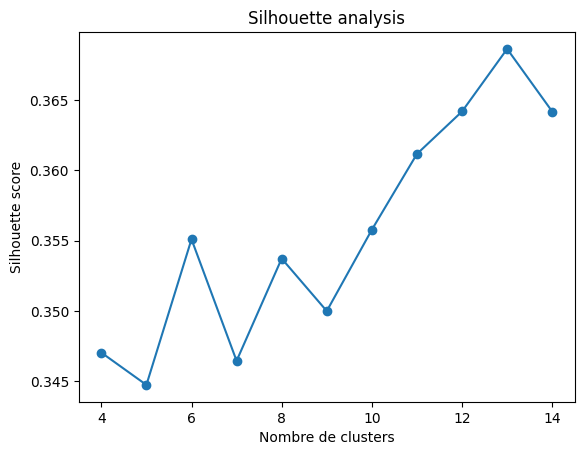

In [21]:
scores = {}

for k in range(4, 15):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X_final)
    scores[k] = silhouette_score(X_final, labels)

pd.Series(scores).plot(marker="o")
plt.xlabel("Nombre de clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette analysis")
plt.show()


In [22]:
k = 11

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_model["cluster"] = kmeans.fit_predict(X_final)

df_model["cluster"].value_counts()


cluster
1     9713
5     6423
3     6179
7     5761
10    4515
8     4264
6     4186
4     3072
0     2633
2     2223
9     1031
Name: count, dtype: int64

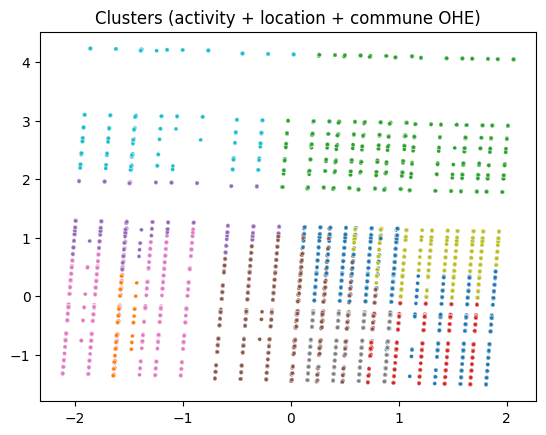

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_final)

sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=df_model["cluster"],
    palette="tab10",
    s=8,
    legend=False
)
plt.title("Clusters (activity + location + commune OHE)")
plt.show()


In [24]:
df_profile = df_sample.loc[df_model.index].copy()
df_profile["cluster"] = df_model["cluster"]


In [25]:
cluster_size = (
    df_profile["cluster"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .rename("share_pct")
)

cluster_size


cluster
1     19.43
5     12.85
3     12.36
7     11.52
10     9.03
8      8.53
6      8.37
4      6.14
0      5.27
2      4.45
9      2.06
Name: share_pct, dtype: float64

In [26]:
dominant_activity = (
    df_profile
    .groupby("cluster")["nom_objet_parent"]
    .agg(lambda x: x.value_counts().index[0])
    .rename("dominant_objet_parent")
)

dominant_activity


cluster
0     CULTURE, PRATIQUES D'ACTIVITÉS ARTISTIQUES, PR...
1                        SPORTS, ACTIVITÉS DE PLEIN AIR
2     ACTIVITÉS RELIGIEUSES, SPIRITUELLES OU PHILOSO...
3     CULTURE, PRATIQUES D'ACTIVITÉS ARTISTIQUES, PR...
4                          ENVIRONNEMENT,  CADRE DE VIE
5                        SPORTS, ACTIVITÉS DE PLEIN AIR
6                        SPORTS, ACTIVITÉS DE PLEIN AIR
7     CULTURE, PRATIQUES D'ACTIVITÉS ARTISTIQUES, PR...
8     AMICALES, GROUPEMENTS AFFINITAIRES, GROUPEMENT...
9     ARMÉE (DONT  PRÉPARATION MILITAIRE, MÉDAILLES)...
10                                 ÉDUCATION  FORMATION
Name: dominant_objet_parent, dtype: object

In [27]:
urban_profile = (
    df_profile
    .groupby("cluster")
    .agg(
        mean_urban_size=("taille_unite_urbaine", "mean"),
        median_urban_size=("taille_unite_urbaine", "median")
    )
    .round(0)
)

urban_profile


,mean_urban_size,median_urban_size
cluster,,
0,7.0,7.0
1,0.0,0.0
2,6.0,7.0
3,7.0,7.0
4,1.0,0.0
5,3.0,3.0
6,2.0,2.0
7,6.0,6.0
8,7.0,7.0


In [28]:
urban_dist = (
    df_profile
    .groupby(["cluster", "statut_commune_unite_urbaine"])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .unstack(fill_value=0)
)

urban_dist


,statut_commune_unite_urbaine,B,C,H,I
cluster,cluster,,,,
0,0,1.000000,0.000000,0.000000,0.000000
1,1,0.000000,0.000000,1.000000,0.000000
2,2,0.547908,0.452092,0.000000,0.000000
3,3,0.992232,0.007768,0.000000,0.000000
4,4,0.000000,0.103190,0.673177,0.223633
5,5,0.258291,0.741709,0.000000,0.000000
6,6,0.000000,0.000000,0.000000,1.000000
7,7,0.000000,1.000000,0.000000,0.000000
8,8,0.999531,0.000469,0.000000,0.000000


In [29]:
top_communes_by_cluster = (
    df_profile
    .groupby("cluster")["standard_name"]
    .agg(lambda x: x.value_counts().head(3).index.tolist())
    .rename("top_communes")
)

top_communes_by_cluster


cluster
0      [Aix-en-Provence, Villeurbanne, Pointe-à -Pitre]
1     [Saint-Étienne-du-Bois, Sartilly-Baie-Bocage, ...
2                       [Toulon, Toulouse, Montpellier]
3                     [Montrouge, Colomiers, Élancourt]
4                       [Poligny, Fégréac, Le Lamentin]
5                             [Tulle, Vierzon, Lannion]
6                  [La Roche-sur-Yon, Narbonne, Cholet]
7                       [Toulouse, Nantes, Montpellier]
8     [Pointe-à -Pitre, Aix-en-Provence, Garges-lès-...
9         [La Roche-sur-Yon, Les Herbiers, Le Lamentin]
10                            [Toulouse, Lille, Nantes]
Name: top_communes, dtype: object

In [30]:
lifecycle = (
    df_profile
    .groupby("cluster")
    .agg(
        mean_age=("age", "mean"),
        median_age=("age", "median")
    )
    .round(1)
)

lifecycle


,mean_age,median_age
cluster,,
0,17.2,13.0
1,26.3,18.0
2,24.6,18.0
3,19.9,14.0
4,20.4,15.0
5,24.0,17.0
6,22.9,16.0
7,19.7,15.0
8,18.7,13.0


In [31]:
cluster_summary = (
    pd.concat(
        [
            cluster_size,
            dominant_activity,
            urban_profile,
            lifecycle,
            top_communes_by_cluster
        ],
        axis=1
    )
    .reset_index()
    .rename(columns={"index": "cluster"})
)

cluster_summary


,cluster,share_pct,dominant_objet_parent,mean_urban_size,median_urban_size,mean_age,median_age,top_communes
0,1,19.43,"SPORTS, ACTIVITÉS DE PLEIN AIR",0.0,0.0,26.3,18.0,"[Saint-Étienne-du-Bois, Sartilly-Baie-Bocage, ..."
1,5,12.85,"SPORTS, ACTIVITÉS DE PLEIN AIR",3.0,3.0,24.0,17.0,"[Tulle, Vierzon, Lannion]"
2,3,12.36,"CULTURE, PRATIQUES D'ACTIVITÉS ARTISTIQUES, PR...",7.0,7.0,19.9,14.0,"[Montrouge, Colomiers, Élancourt]"
3,7,11.52,"CULTURE, PRATIQUES D'ACTIVITÉS ARTISTIQUES, PR...",6.0,6.0,19.7,15.0,"[Toulouse, Nantes, Montpellier]"
4,10,9.03,ÉDUCATION FORMATION,6.0,6.0,22.1,16.0,"[Toulouse, Lille, Nantes]"
5,8,8.53,"AMICALES, GROUPEMENTS AFFINITAIRES, GROUPEMENT...",7.0,7.0,18.7,13.0,"[Pointe-à -Pitre, Aix-en-Provence, Garges-lès-..."
6,6,8.37,"SPORTS, ACTIVITÉS DE PLEIN AIR",2.0,2.0,22.9,16.0,"[La Roche-sur-Yon, Narbonne, Cholet]"
7,4,6.14,"ENVIRONNEMENT, CADRE DE VIE",1.0,0.0,20.4,15.0,"[Poligny, Fégréac, Le Lamentin]"
8,0,5.27,"CULTURE, PRATIQUES D'ACTIVITÉS ARTISTIQUES, PR...",7.0,7.0,17.2,13.0,"[Aix-en-Provence, Villeurbanne, Pointe-à -Pitre]"
9,2,4.45,"ACTIVITÉS RELIGIEUSES, SPIRITUELLES OU PHILOSO...",6.0,7.0,24.6,18.0,"[Toulon, Toulouse, Montpellier]"


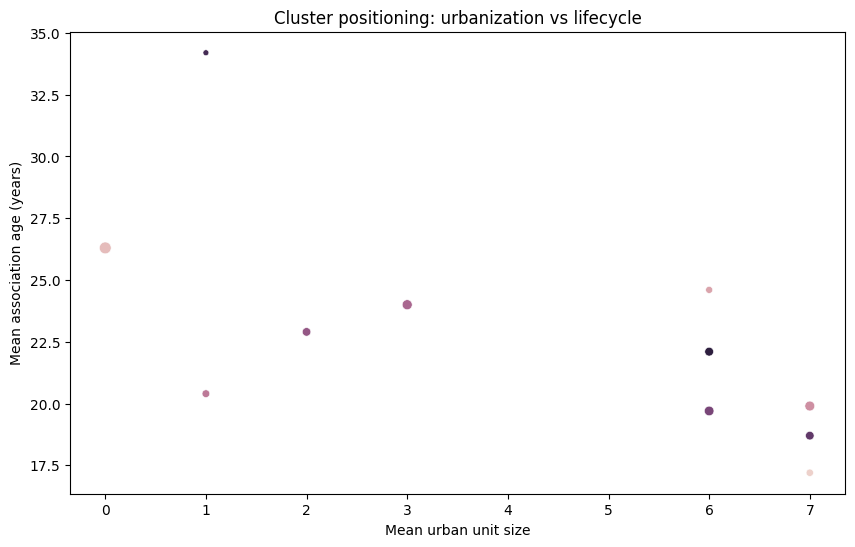

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=cluster_summary,
    x="mean_urban_size",
    y="mean_age",
    size="share_pct",
    hue="cluster",
    legend=False
)
plt.xlabel("Mean urban unit size")
plt.ylabel("Mean association age (years)")
plt.title("Cluster positioning: urbanization vs lifecycle")
plt.show()


In [33]:
cluster_labels = {
    1: "Rural long-lived sports associations",
    5: "Small-town sports associations",
    3: "Dense urban cultural micro-associations",
    7: "Large metropolitan cultural associations",
    10: "Urban education & training organizations",
    8: "Young urban affinity & community groups",
    6: "Peri-urban sports associations",
    4: "Rural environmental & local action groups",
    0: "Young metropolitan cultural initiatives",
    2: "Urban religious & spiritual organizations",
    9: "Very old rural military & veterans associations"
}


In [34]:
cluster_summary["cluster_name"] = (
    cluster_summary["cluster"]
    .map(cluster_labels)
)


In [35]:
cluster_summary = cluster_summary[
    [
        "cluster",
        "cluster_name",
        "share_pct",
        "dominant_objet_parent",
        "mean_urban_size",
        "median_urban_size",
        "mean_age",
        "median_age",
        "top_communes"
    ]
]
df_profile["cluster_name"] = df_profile["cluster"].map(cluster_labels)


In [36]:
df_profile.groupby("cluster_name").size().sort_values(ascending=False)


cluster_name
Rural long-lived sports associations               9713
Small-town sports associations                     6423
Dense urban cultural micro-associations            6179
Large metropolitan cultural associations           5761
Urban education & training organizations           4515
Young urban affinity & community groups            4264
Peri-urban sports associations                     4186
Rural environmental & local action groups          3072
Young metropolitan cultural initiatives            2633
Urban religious & spiritual organizations          2223
Very old rural military & veterans associations    1031
dtype: int64

In [37]:
df_profile.groupby("cluster_name")["age"].mean().sort_values()


cluster_name
Young metropolitan cultural initiatives            17.237752
Young urban affinity & community groups            18.662523
Large metropolitan cultural associations           19.673841
Dense urban cultural micro-associations            19.932999
Rural environmental & local action groups          20.414388
Urban education & training organizations           22.067774
Peri-urban sports associations                     22.914955
Small-town sports associations                     24.034719
Urban religious & spiritual organizations          24.557355
Rural long-lived sports associations               26.285597
Very old rural military & veterans associations    34.171678
Name: age, dtype: float64

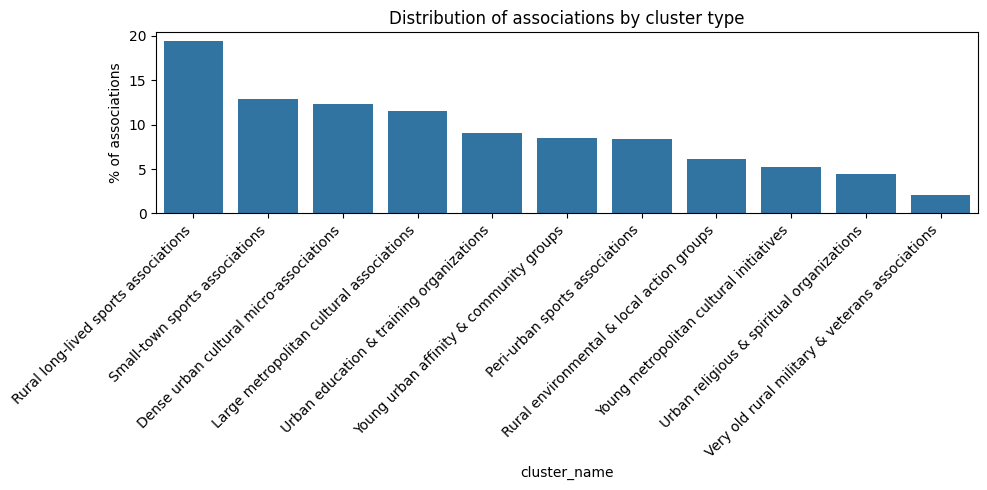

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=cluster_summary.sort_values("share_pct", ascending=False),
    x="cluster_name",
    y="share_pct"
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("% of associations")
plt.title("Distribution of associations by cluster type")
plt.tight_layout()
plt.show()
